In [48]:
import numpy as np
from matplotlib import pyplot as plt

In [49]:
def f(t):
    if (t <= 0.1):
        return 10.0*t
    elif (t >= 0.1 and t <= 0.4):
        return -10.0*t+2.0
    elif (t >= 0.4 and t <= 0.7):
        return 10.0*t-6.0
    elif (t >= 0.7 and t <= 0.9):
        return -10.0*t+8.0
    elif (t >= 0.9 and t <= 1.3):
        return 10.0*t-10.0
    elif (t >= 1.3 and t <= 1.8):
        return -10.0*t+16.0
    elif (t >= 1.8 and t <= 2.1):
        return 10.0*t-20.0
    elif (t >= 2.1 and t <= 2.3):
        return -10.0*t+22.0
    elif (t >= 2.3 and t <= 2.4):
        return 10.0*t-24.0
    else:
        return 0.0

In [50]:
pi = np.pi

# material
m = 3.0
c = 0.0
k = 1200.0*pi*pi

# period
wn = np.sqrt(k/m)
Tn = 2.0*pi/wn
print("Tn = %4.2f(s)"%Tn)

# I.C.
uo = 0.0
vo = 0.0

Tn = 0.10(s)


In [51]:
N = 5001

EndTime = 3.0
tns = np.linspace(0, EndTime, N)
dt = tns[1]-tns[0] if ((tns[1]-tns[0]) > 0.1*Tn) else 0.1*Tn

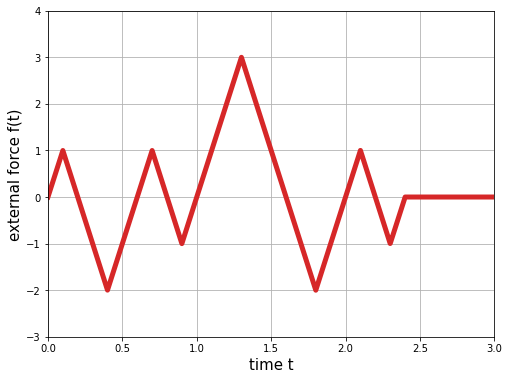

In [52]:
fns = np.zeros(N)
for i in range(N):
    t = tns[i]
    fns[i] = f(t)

plt.figure(figsize=(8, 6))
plt.plot(tns, fns, lw=5, color="tab:red")
plt.xlim(0, EndTime)
plt.xlabel("time t", fontsize=15)
plt.ylabel("external force f(t)", fontsize=15)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
plt.yticks([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
plt.grid(True)
plt.show()

In [53]:
def sdof_solver(m, c, k, f, uo, vo, tns, N):
    uns = np.zeros(N)
    vns = np.zeros(N)
    ans = np.zeros(N)
    
    un = uo
    vn = vo
    an = f(0)/m-(c/m)*vn-(k/m)*un
    dt = tns[1]-tns[0]
    for i in range(N):
        t = tns[i]
        if (t != 0):
            vn += dt*an
            un += dt*vn
            an = f(t)/m-(c/m)*vn-(k/m)*un
        uns[i] = un
        vns[i] = vn
        ans[i] = an
    return (uns, vns, ans)        

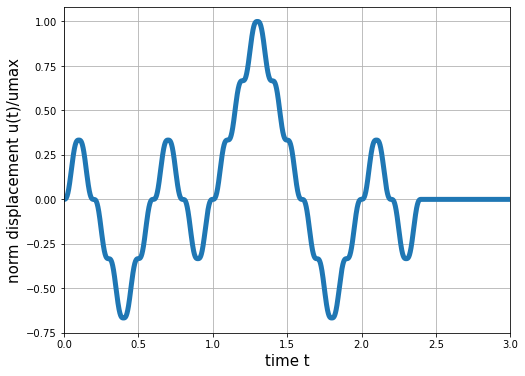

In [59]:
# solve
uns, vns, ans = sdof_solver(m, c, k, f, uo, vo, tns, N)
umax = max(np.abs(uns))

# plot
plt.figure(figsize=(8, 6))
plt.plot(tns, uns/umax, lw=5)
plt.xlim(0, EndTime)
plt.xlabel("time t", fontsize=15)
plt.ylabel("norm displacement u(t)/umax", fontsize=15)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
# plt.yticks([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
plt.grid(True)
plt.show()

In [60]:
print("uo = %6.4e"%(3/k))
print("max|u(t)| = %6.4e"%umax)

uo = 2.5330e-04
max|u(t)| = 2.5329e-04
